In [1]:
#Housing Price Prediction- Complete Analysis
#Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df=pd.read_csv('C:/Users/pramo/OneDrive/Desktop/House_Price_Dataset/train.csv')
test_df=pd.read_csv('C:/Users/pramo/OneDrive/Desktop/House_Price_Dataset/test.csv')
print('Successfully loaded train_df and test_df from local file')
print(f"Train Shape:{train_df.shape}")
print(f"Test Shape:{test_df.shape}")

Successfully loaded train_df and test_df from local file
Train Shape:(1460, 81)
Test Shape:(1459, 80)


In [5]:
#Information of dataset
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Missing values in data set.
print('\n Missing Values in train_df')
display(train_df.isnull().sum()[train_df.isnull().sum()>0])
print('\n Missing values in test_df')
display(test_df.isnull().sum()[test_df.isnull().sum()>0])


 Missing Values in train_df


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


 Missing values in test_df


MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [9]:
#Check duplicate rows in dataset
print('\n Duplicate rows in train_df dataset')
print(train_df.duplicated().sum())
print('\n Duplicate rows in test_df dataset')
print(test_df.duplicated().sum())


 Duplicate rows in train_df dataset
0

 Duplicate rows in test_df dataset
0


In [11]:
#convert MSSubClass and MoSold to object as it is categorical variable.
train_df['MSSubClass']=train_df['MSSubClass'].astype(str)
train_df['MoSold']=train_df['MoSold'].astype(str)

test_df['MSSubClass']=test_df['MSSubClass'].astype(str)
test_df['MoSold']=test_df['MoSold'].astype(str)


In [13]:
# Separate features by data type

categorical_cols=train_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols=train_df.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']

Numerical Columns:
['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'Garage

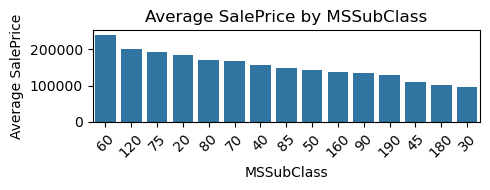

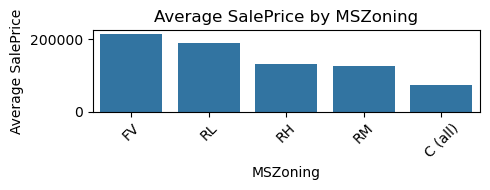

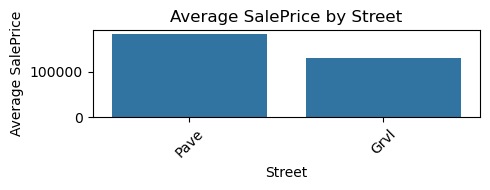

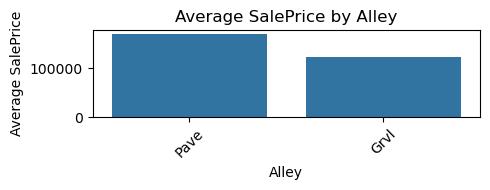

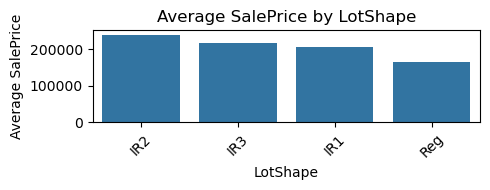

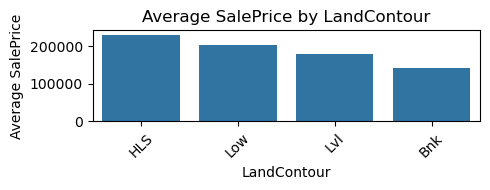

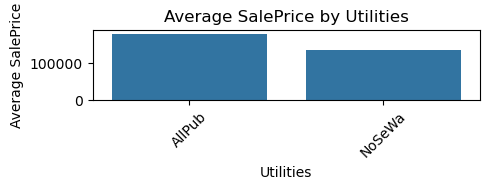

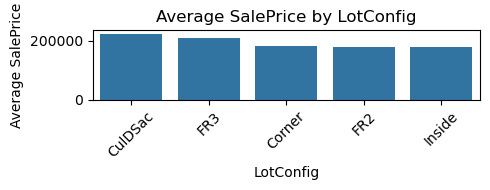

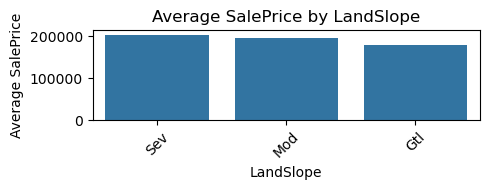

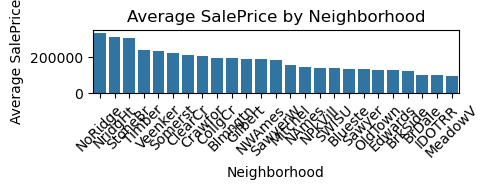

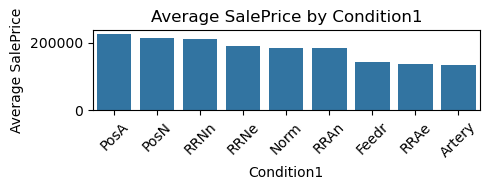

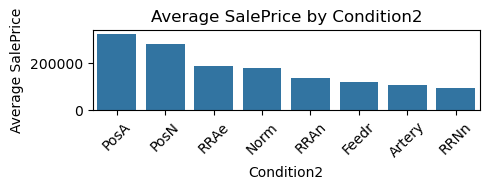

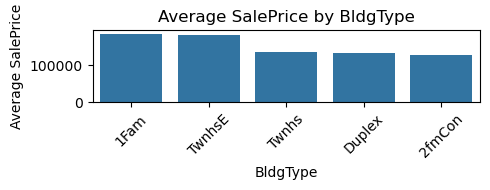

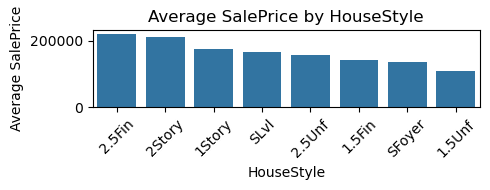

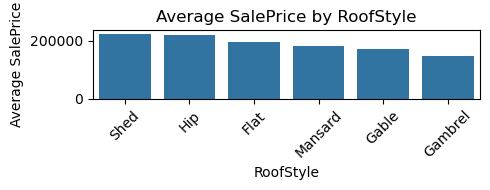

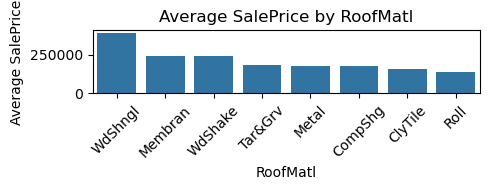

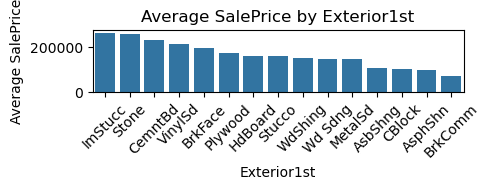

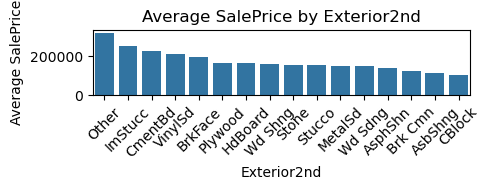

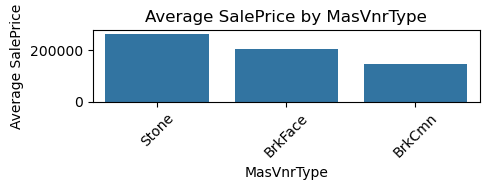

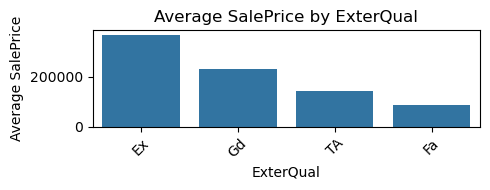

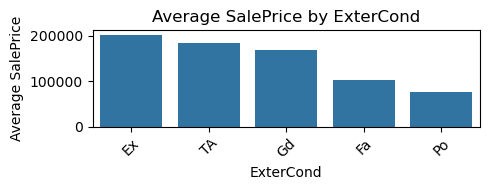

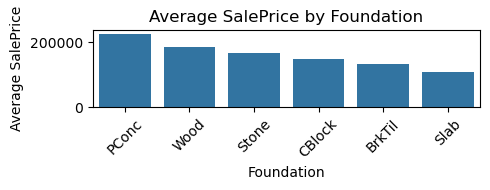

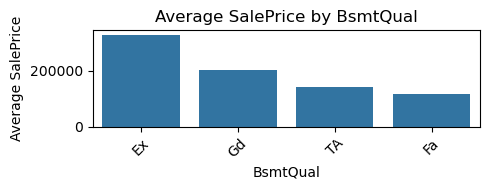

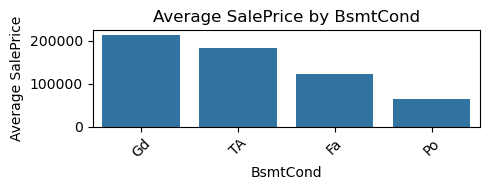

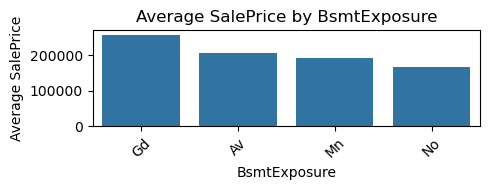

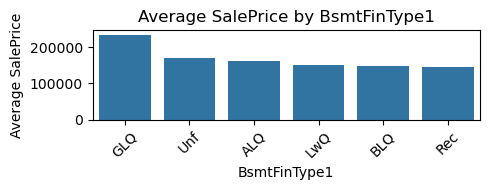

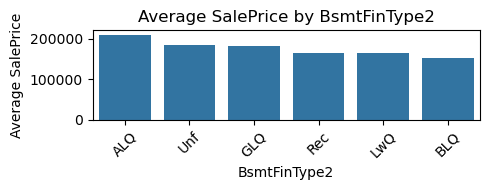

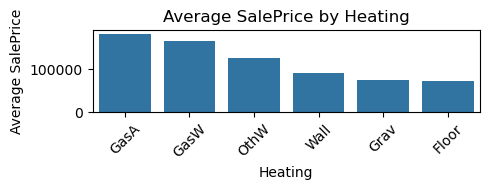

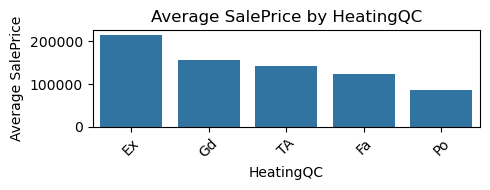

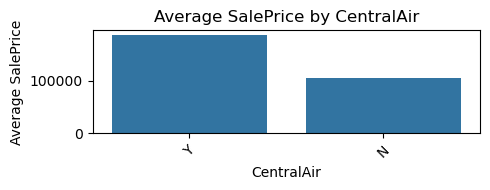

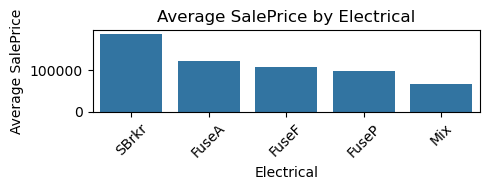

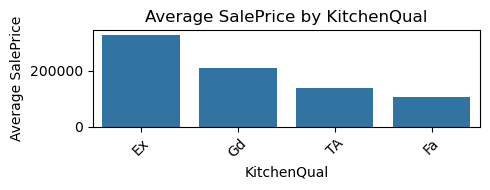

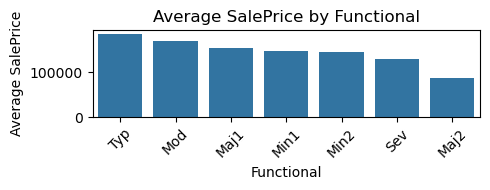

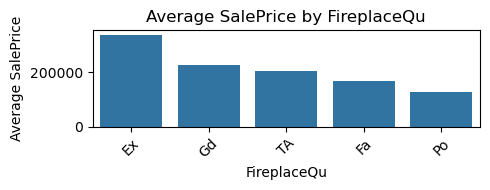

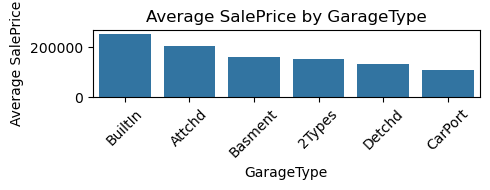

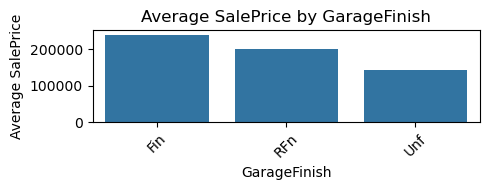

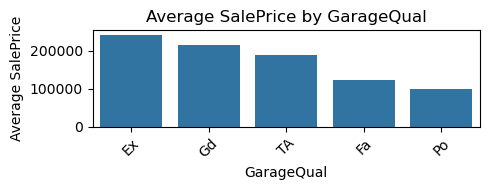

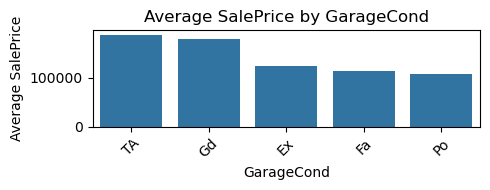

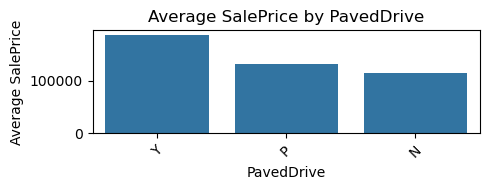

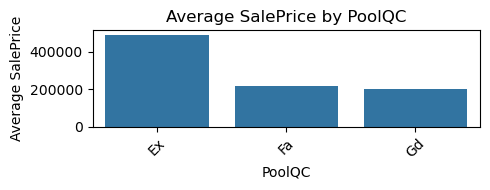

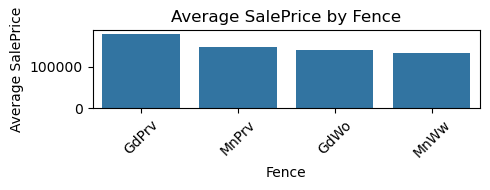

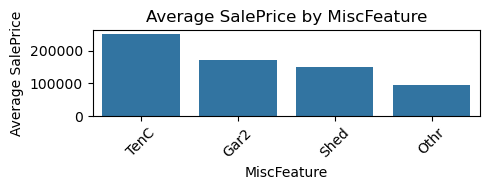

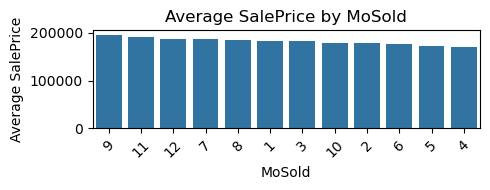

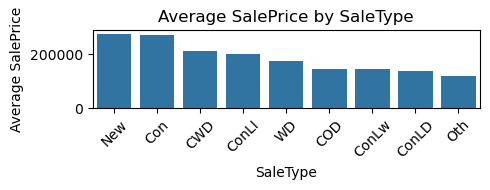

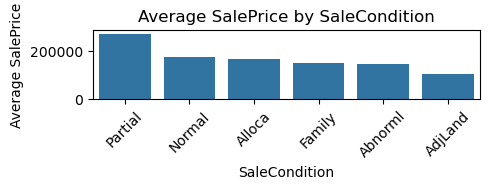

In [15]:
#Lets explore the everage sale price of each category in categorical column.
for col in categorical_cols:
    plt.figure(figsize=(5,2))
    avg_price = train_df.groupby(col)['SalePrice'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_price.index, y=avg_price.values)
    plt.xticks(rotation=45)
    plt.title(f'Average SalePrice by {col}')
    plt.ylabel('Average SalePrice')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

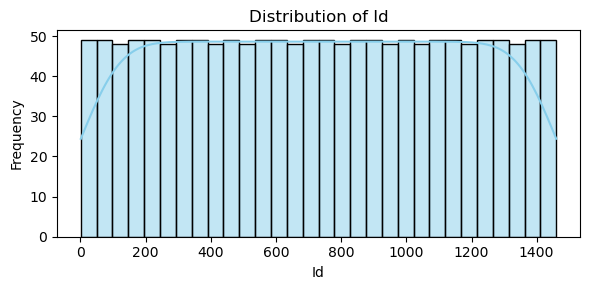

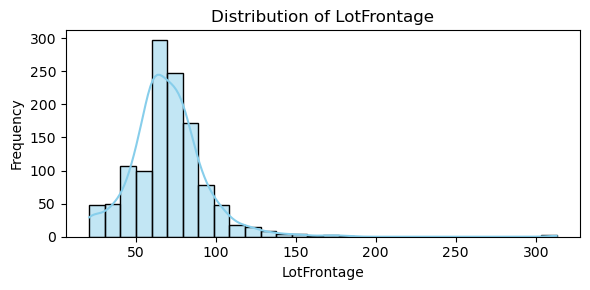

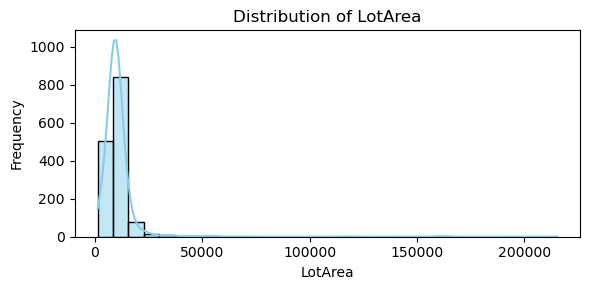

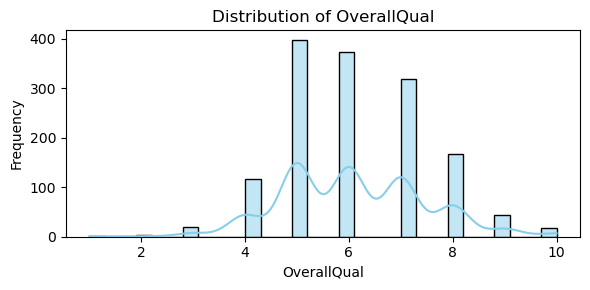

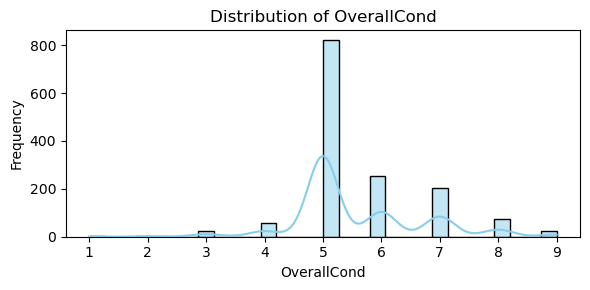

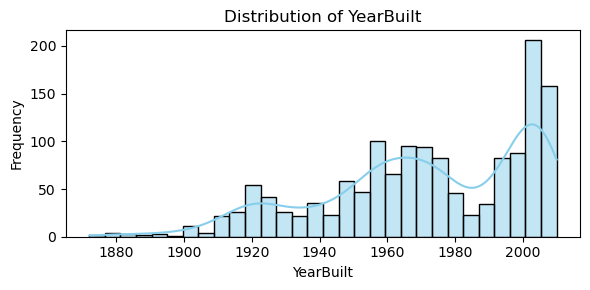

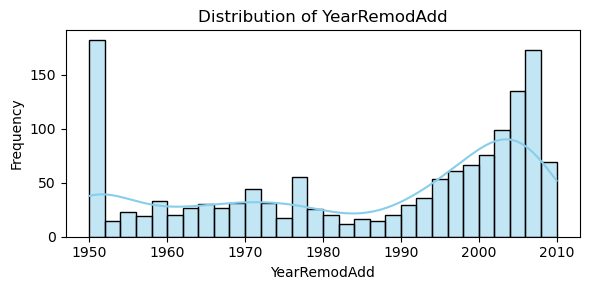

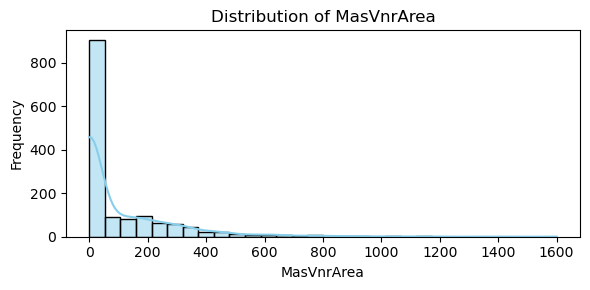

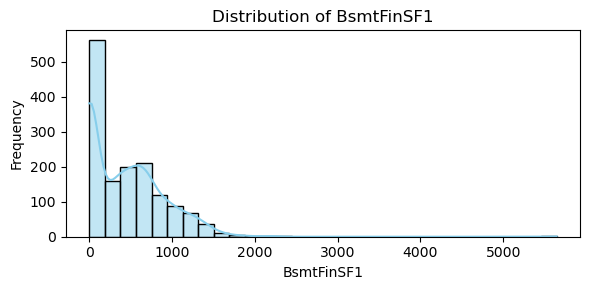

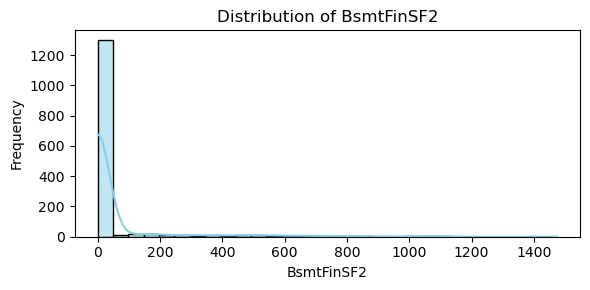

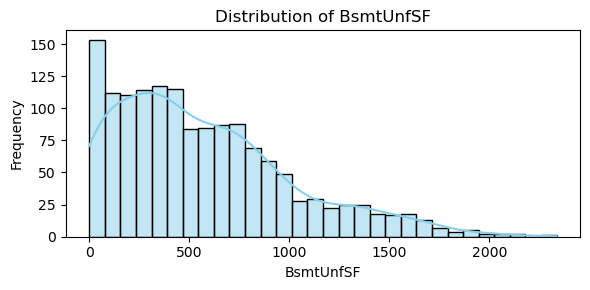

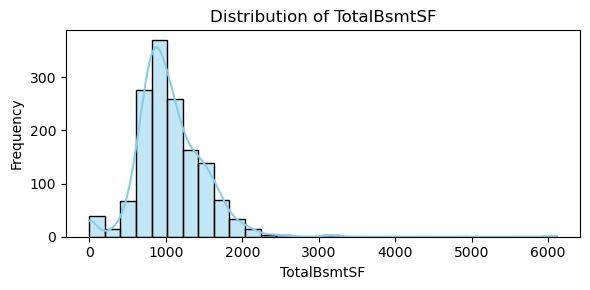

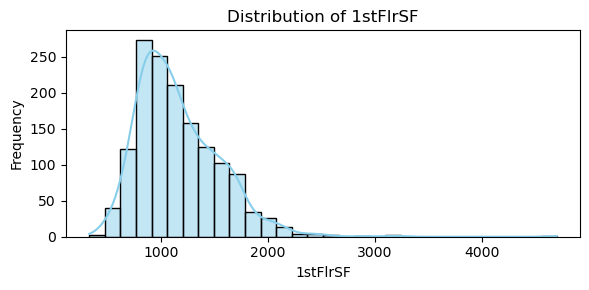

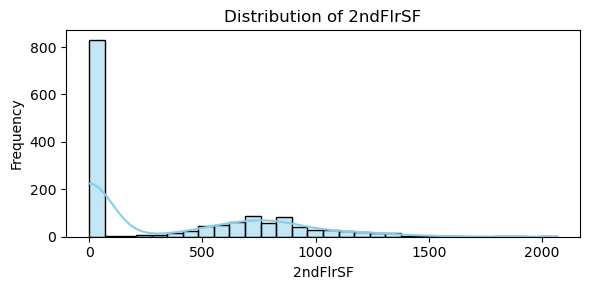

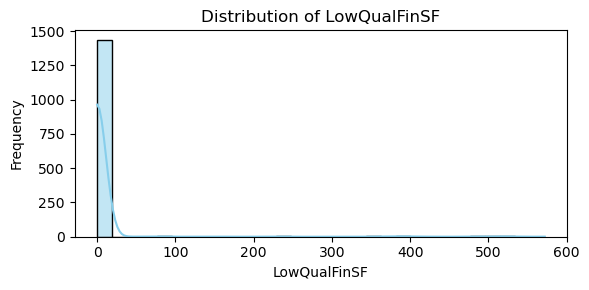

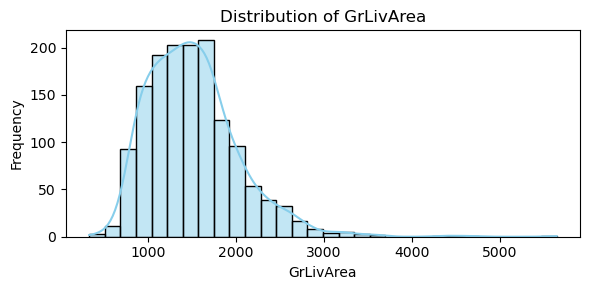

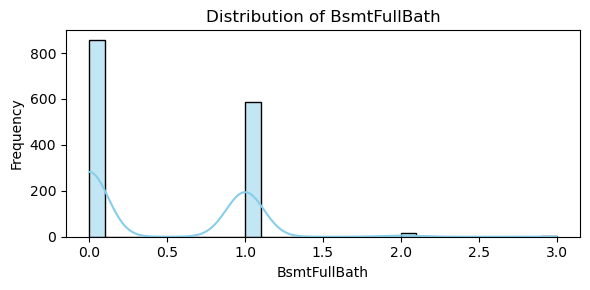

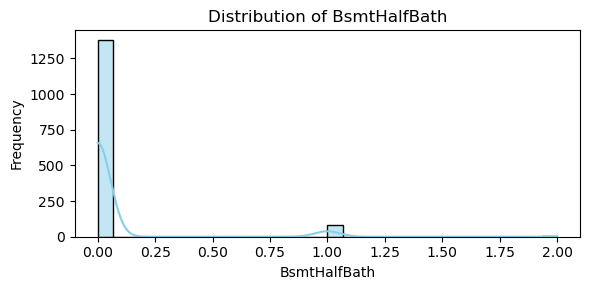

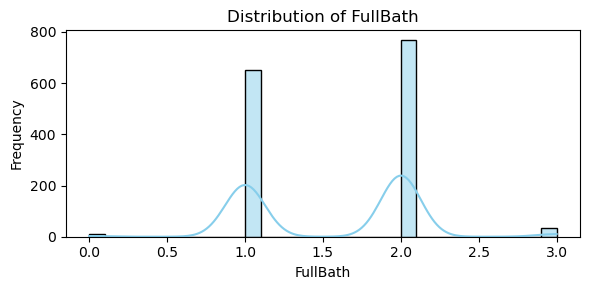

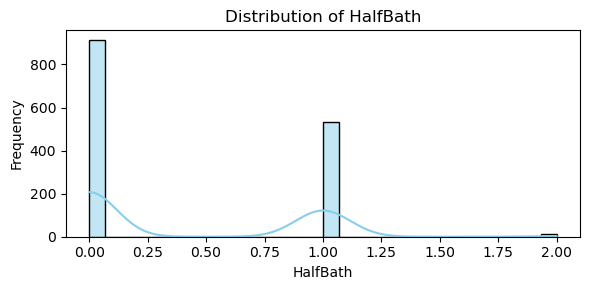

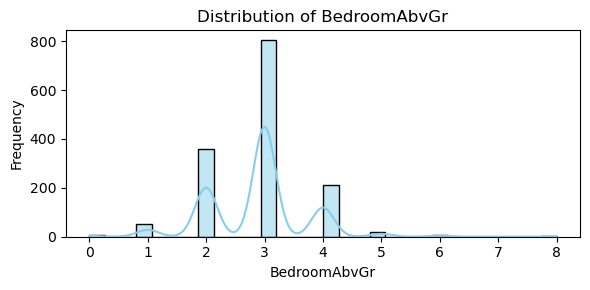

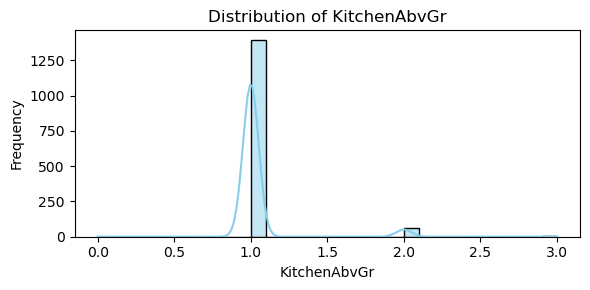

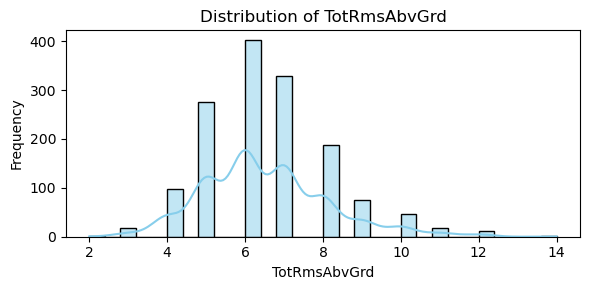

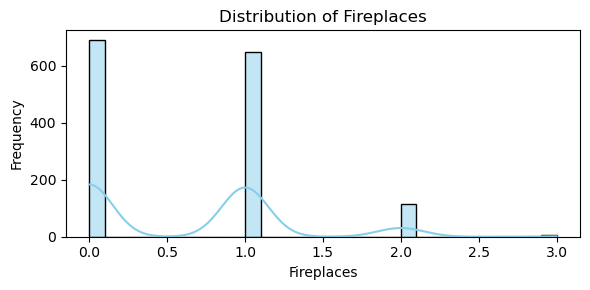

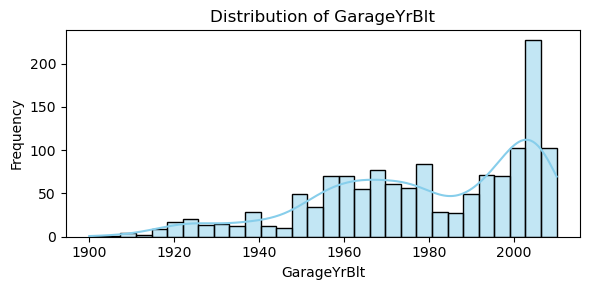

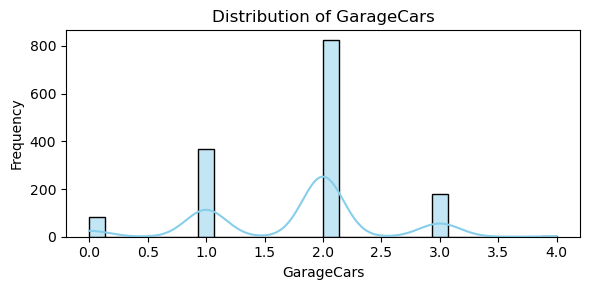

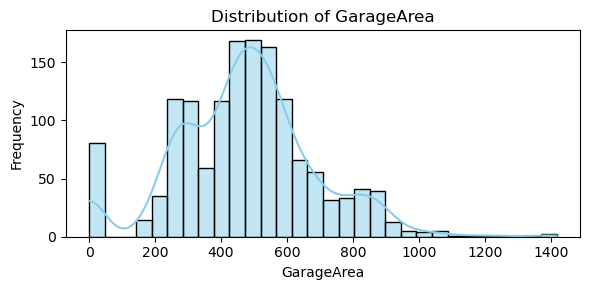

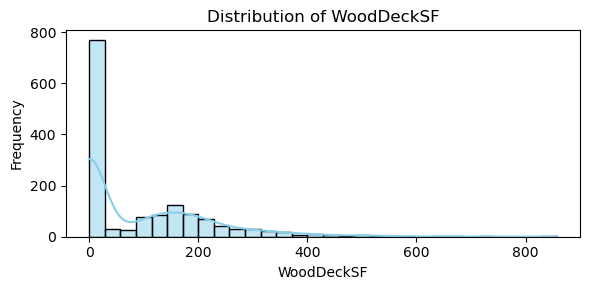

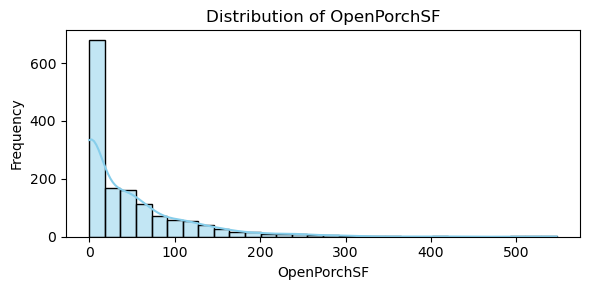

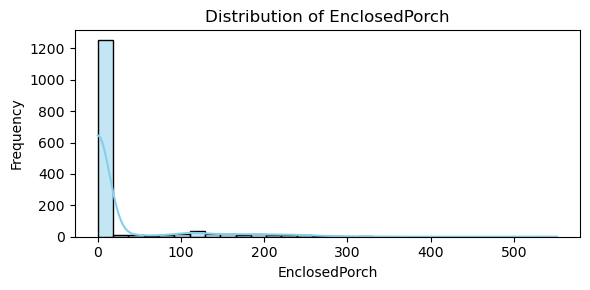

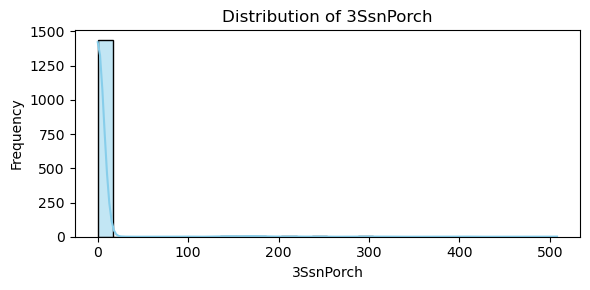

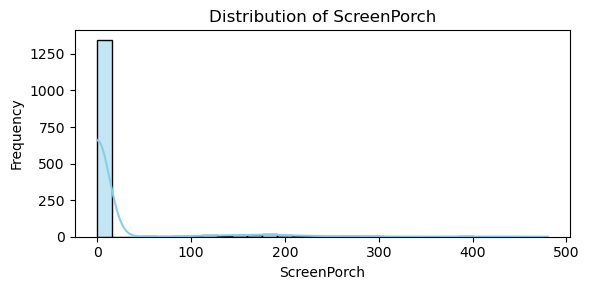

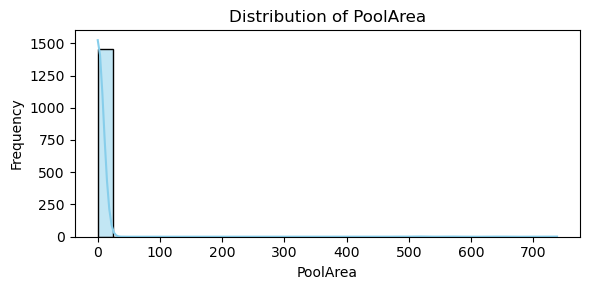

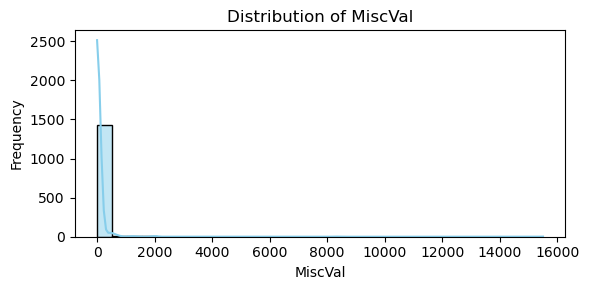

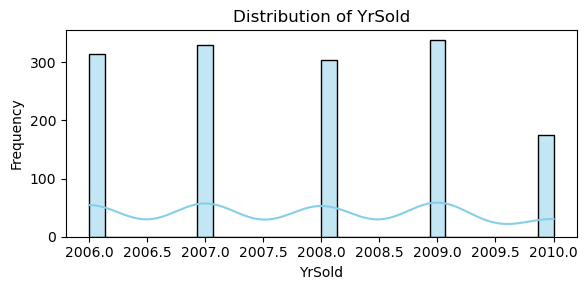

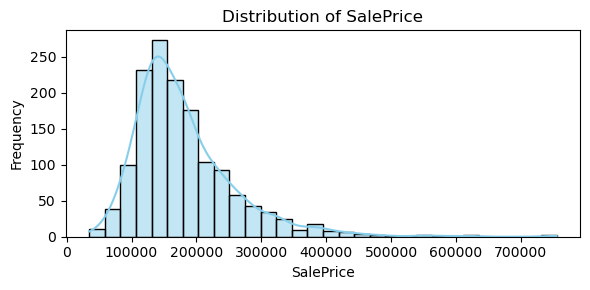

In [17]:
#Lets expolore the distribution of each numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(train_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [19]:
#Lets explore the skewness of each numerical columns
skewed = train_df[numerical_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
print(skewed)


MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
GarageYrBlt      -0.649415
dtype: float64


In [21]:
'''
We need to drop some of the columns which are given below:
1.Utilities: All the categories are same except one and it has missing value in test dataset.
2.MiscFeatures: We have separate column for miscillanious value so we can drop this column.
3.GarageCond, GarageYrBlt, GarageQual, GarageFinish, GarageCars : We delete these features as we only keeps garaze size in squire feet and garaze
  location.
4.ID: We delete it as this is only the identification.
5. Neighourhood: for the purpose of liner regression model we delete this column but we use this columns in tree based model.
6. Exterior2nd: only keep exterior first.
8.'BsmtExposure'
9. BsmtFinType2'
10. 'BsmtFinSF2'
11. 'BsmtUnfSF'
12. Mosold: As this columns does not make any significance difference.

'''
#Delete unnecessary columns in dataset.
# Define the columns to drop from both datasets
columns_to_drop = [
    'MiscFeature',
    'GarageCond',
    'GarageYrBlt',
    'GarageQual',
    'GarageFinish',
    'Utilities',
    'GarageCars',
    'Id',
    'Exterior2nd',
    'BsmtExposure',
    'BsmtFinType2',
    'BsmtFinSF2',
    'BsmtUnfSF',
]

# Drop the columns from the training data
train_df = train_df.drop(columns=columns_to_drop)

# Drop the columns from the test data
# The 'Id' column is already in the list, and 'SalePrice' is not in the test data
test_df = test_df.drop(columns=columns_to_drop)

print("Columns dropped from both training and test data.")
print(f"New shape of training data: {train_df.shape}")
print(f"New shape of test data: {test_df.shape}")

Columns dropped from both training and test data.
New shape of training data: (1460, 68)
New shape of test data: (1459, 67)


In [23]:
#Lets find out the unique values in each categorical columns
# Filter only columns that still exist in train_df
categorical_cols = [col for col in categorical_cols if col in train_df.columns]

# Now loop safely
for col in categorical_cols:
    print(f"{col}: {train_df[col].nunique()} unique values")

MSSubClass: 15 unique values
MSZoning: 5 unique values
Street: 2 unique values
Alley: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 8 unique values
BldgType: 5 unique values
HouseStyle: 8 unique values
RoofStyle: 6 unique values
RoofMatl: 8 unique values
Exterior1st: 15 unique values
MasVnrType: 3 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 4 unique values
BsmtCond: 4 unique values
BsmtFinType1: 6 unique values
Heating: 6 unique values
HeatingQC: 5 unique values
CentralAir: 2 unique values
Electrical: 5 unique values
KitchenQual: 4 unique values
Functional: 7 unique values
FireplaceQu: 5 unique values
GarageType: 6 unique values
PavedDrive: 3 unique values
PoolQC: 3 unique values
Fence: 4 unique values
MoSold: 12 unique values
SaleType: 9 unique values
SaleCondition: 6 unique v

In [25]:
'''
Some feature engineering of data to binary data
1. Pool Quality: Make convert the data with pool 1 and with no pool to 0
2. Allay: With allay to 1 and without aallay to 0
3. CentralAir: if yes 1 if no 0.
'''
#Binary encoding for PoolQC and Alley
train_df['HasPool'] = train_df['PoolQC'].apply(lambda x: 0 if pd.isna(x) else 1)
test_df['HasPool'] = test_df['PoolQC'].apply(lambda x: 0 if pd.isna(x) else 1)

train_df['HasAlley'] = train_df['Alley'].apply(lambda x: 0 if pd.isna(x) else 1)
test_df['HasAlley'] = test_df['Alley'].apply(lambda x: 0 if pd.isna(x) else 1)

train_df['CentralAir'] = train_df['CentralAir'].map({'Y': 1, 'N': 0})
test_df['CentralAir'] = test_df['CentralAir'].map({'Y': 1, 'N': 0})


In [27]:
#Drop the column poolQC and Alley as we have created binary column:
train_df = train_df.drop(['PoolQC', 'Alley'], axis=1)
test_df = test_df.drop(['PoolQC', 'Alley'], axis=1)

In [29]:
#Missing values in data set.
print('\n Missing Values in train_df')
display(train_df.isnull().sum()[train_df.isnull().sum()>0])
print('\n Missing values in test_df')
display(test_df.isnull().sum()[test_df.isnull().sum()>0])


 Missing Values in train_df


LotFrontage      259
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
Electrical         1
FireplaceQu      690
GarageType        81
Fence           1179
dtype: int64


 Missing values in test_df


MSZoning           4
LotFrontage      227
Exterior1st        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtFinType1      42
BsmtFinSF1         1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageArea         1
Fence           1169
SaleType           1
dtype: int64

In [31]:
'''
Missing values imputation strategies:
1.Imputation with Mode:
'KitchenQual', : Impute with mode value
'Functional': Impute with median value
 'Electrical': Impute with median value. 
 'MSZoning': Impute with median
 'Exterior1st', Impute with mmode
2. Imputation with median:
'BsmtFullBath': Impute with median, 
'BsmtHalfBath': Impute with median
3. Imputation with mean:
 'LotFrontage': impute missing values with mean
 'GarageArea': Impute with mean
4. Imputation with 0
 'MasVnrArea':impute with 0
 'BsmtFinSF1': Impute with 0
 'TotalBsmtSF': Impute with 0
5. Imputation with 'None':
 'MasVnrType': Impute with None.
'BsmtQual':Impute missing value with None.
'BsmtCond', : Impute missing value with None.
 'BsmtFinType1': Impute the missing value with None.
 'FireplaceQu': Impute missing value with None.
 'GarageType',: Impute missing with None
'Fence': Impute missing value with None/ 
6. Impute with other:
 'SaleType': impute this with Other 

Note: LotFrontage: First impute with mean and next delete column and check the improvement in R and MAE than decide.)
'''
mode_impute_cols = ['KitchenQual', 'Functional', 'Electrical', 'MSZoning', 'Exterior1st']

for col in mode_impute_cols:
    mode_val = train_df[col].mode()[0]
    train_df[col].fillna(mode_val, inplace=True)
    test_df[col].fillna(mode_val, inplace=True)

median_impute_cols = ['BsmtFullBath', 'BsmtHalfBath']

for col in median_impute_cols:
    median_val = train_df[col].median()
    train_df[col].fillna(median_val, inplace=True)
    test_df[col].fillna(median_val, inplace=True)

mean_impute_cols = ['LotFrontage', 'GarageArea']

for col in mean_impute_cols:
    mean_val = train_df[col].mean()
    train_df[col].fillna(mean_val, inplace=True)
    test_df[col].fillna(mean_val, inplace=True)

zero_impute_cols = ['MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF']

for col in zero_impute_cols:
    train_df[col].fillna(0, inplace=True)
    test_df[col].fillna(0, inplace=True)

none_impute_cols = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
                    'FireplaceQu', 'GarageType', 'Fence']

for col in none_impute_cols:
    train_df[col].fillna('None', inplace=True)
    test_df[col].fillna('None', inplace=True)

train_df['SaleType'].fillna('Other', inplace=True)
test_df['SaleType'].fillna('Other', inplace=True)


C:\Users\pramo\AppData\Local\Temp\ipykernel_19412\3420577601.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(mode_val, inplace=True)
C:\Users\pramo\AppData\Local\Temp\ipykernel_19412\3420577601.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [33]:
#Missing values in data set.
print('\n Missing Values in train_df')
display(train_df.isnull().sum()[train_df.isnull().sum()>0])
print('\n Missing values in test_df')
display(test_df.isnull().sum()[test_df.isnull().sum()>0])


 Missing Values in train_df


Series([], dtype: int64)


 Missing values in test_df


Series([], dtype: int64)

In [35]:
#Create new column House Age from year sold and built or midified data.
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearRemodAdd']

#Now delete the other column form data set related to house data
train_df.drop(columns=['YrSold', 'YearRemodAdd', 'YearBuilt'], inplace=True)
test_df.drop(columns=['YrSold', 'YearRemodAdd', 'YearBuilt'], inplace=True)


In [37]:
#Log transform the rightly skewed target variables (sale price)
#train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
train_df['SalePrice']=np.log1p(train_df['SalePrice'])

In [39]:
#lets deal with high skewed values in data set.
skewed_cols = ['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
               'KitchenAbvGr','ScreenPorch', 'BsmtHalfBath',
               'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'LotFrontage']

for col in skewed_cols:
    train_df[col] = train_df[col].apply(lambda x: np.log1p(x))
    test_df[col] = test_df[col].apply(lambda x: np.log1p(x))


In [41]:
#Apply one hot encoding
categorical_column = train_df.select_dtypes(include='object').columns.tolist()

train_df_encoded = pd.get_dummies(train_df, columns=categorical_column, drop_first=True)
test_df_encoded = pd.get_dummies(test_df, columns=categorical_column, drop_first=True)

# Align columns
train_cols = train_df_encoded.columns
test_df_encoded = test_df_encoded.reindex(columns=train_cols, fill_value=0)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
X = train_df_encoded.drop(columns=['SalePrice'])
y = train_df_encoded['SalePrice']

#train-test split of data set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
#Fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Make prediction
y_pred = lr_model.predict(X_val)

#Evaluate the model
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.10
RMSE: 0.19
R² Score: 0.8002


C:\Users\pramo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [58]:
# Reverse the log1p transformation
y_val_original = np.expm1(y_val)
y_pred_original = np.expm1(y_pred)

# Recalculate MAE and RMSE in original scale
mae_original = mean_absolute_error(y_val_original, y_pred_original)
rmse_original = mean_squared_error(y_val_original, y_pred_original, squared=False)

print(f"MAE (original scale): {mae_original:.2f}")
print(f"RMSE (original scale): {rmse_original:.2f}")

MAE (original scale): 15738.54
RMSE (original scale): 26773.62


C:\Users\pramo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


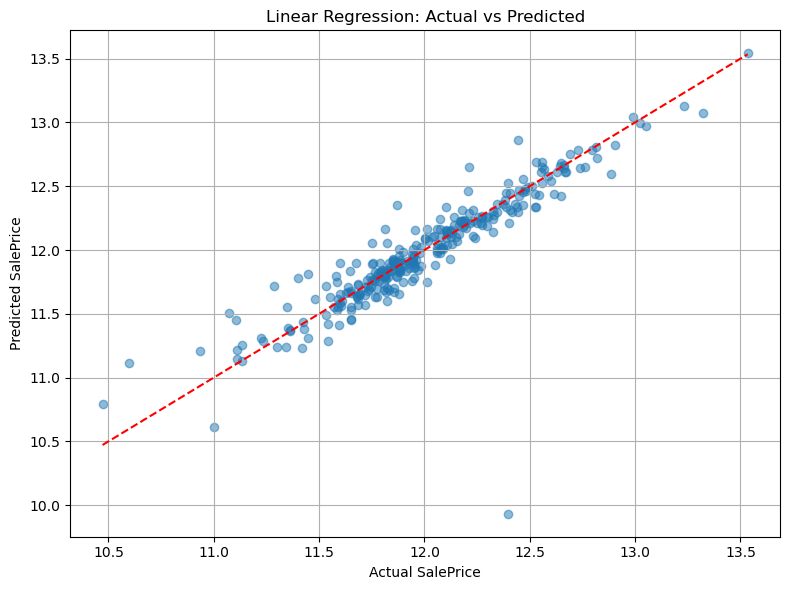

In [49]:
#Plot predicted vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
# Reverse the log1p transformation
y_val_original = np.expm1(y_val)
y_pred_original = np.expm1(y_pred)

# Recalculate MAE and RMSE in original scale
mae_original = mean_absolute_error(y_val_original, y_pred_original)
rmse_original = mean_squared_error(y_val_original, y_pred_original, squared=False)

print(f"MAE (original scale): {mae_original:.2f}")
print(f"RMSE (original scale): {rmse_original:.2f}")

MAE (original scale): 15738.54
RMSE (original scale): 26773.62


C:\Users\pramo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [51]:
# Reverse log1p transformation
y_pred_actual = np.expm1(y_pred)
y_val_actual = np.expm1(y_val)

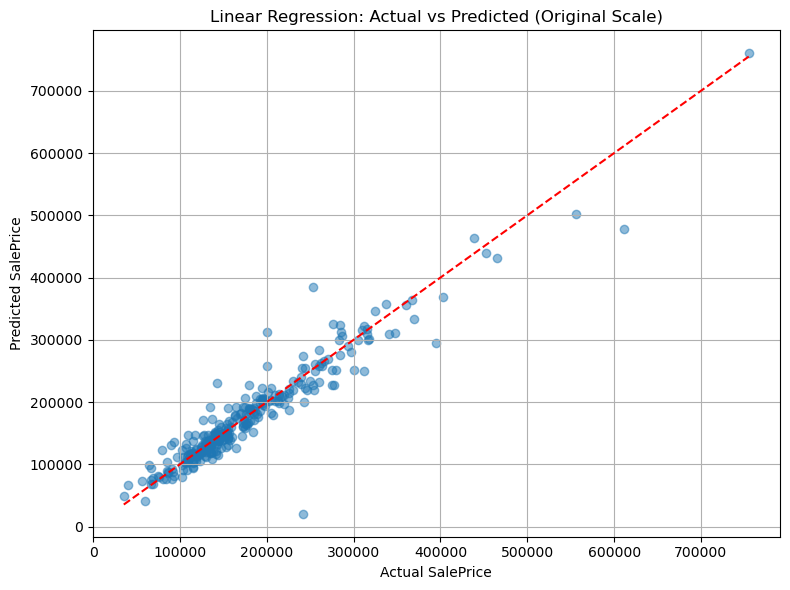

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_val_actual, y_pred_actual, alpha=0.5)
plt.plot([y_val_actual.min(), y_val_actual.max()],
         [y_val_actual.min(), y_val_actual.max()], 'r--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Linear Regression: Actual vs Predicted (Original Scale)')
plt.grid(True)
plt.tight_layout()
plt.show()